# **TSF Summer Internship**
# **Task - 1: Prediction Using Supervised ML**
**Aim:** Predict the percentage of a student based on the number of study hours.

**Author:** Dhruv Shah

**Importing the required Libraries** 

In [59]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

**Importing Data**

In [60]:
df = pd.read_csv('http://bit.ly/w-data')

**Reading the Data**

In [61]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [62]:
df.tail()


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [63]:
df.size

50

**Checking whether values from the given values of data are missing or not and also whether valid values are present or not** 

In [64]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [65]:
df.notna()

,Hours,Scores
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


**Visualizing the data**

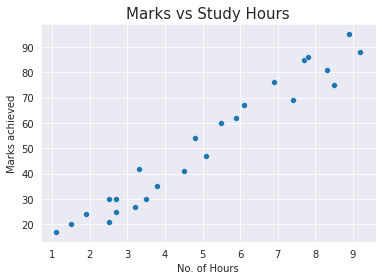

In [66]:
sns.set_style('darkgrid')
sns.scatterplot(y = df['Scores'], x = df['Hours'])
plt.title("Marks vs Study Hours", size = 15)
plt.xlabel("No. of Hours")
plt.ylabel("Marks achieved")
plt.show()

**We can assume a positive correlation between marks achieved and no. of hours studied from the plot. To confirm the correlation, we plot a regression line and using the corr function we also see the correlation between the two variables.**

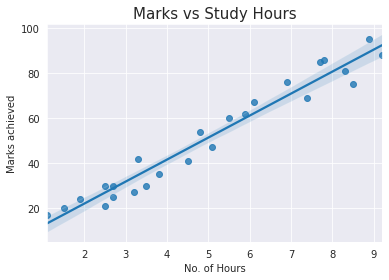

In [67]:
sns.set_style('darkgrid')
sns.regplot(y = df['Scores'], x = df['Hours'])
plt.title("Marks vs Study Hours", size = 15)
plt.xlabel("No. of Hours")
plt.ylabel("Marks achieved")
plt.show()

In [68]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


**From the plot and the correlation function, we conclude our proposed hypothesis.**

**Training the Model**

1.   Splitting the data
2.   Fitting the train data set into the model




In [87]:
#Defining x to no. of study hours and y to marks 
x = df.iloc[:, : -1].values
y = df.iloc[:, 1].values

#splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [88]:
#defining a regression model and fitting the train data to the model
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the Marks using the model**

In [89]:
y_pred = reg_model.predict(x_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Marks': [k for k in y_test]})
prediction

,Hours,Predicted Marks
0,4.5,41
1,3.3,42
2,5.1,47
3,4.8,54
4,1.9,24
5,5.9,62
6,8.9,95


**Comparing the Predicted marks with Actual marks**

In [90]:
comparision = pd.DataFrame({'Predicted Marks': y_pred, 'Actual Marks': y_test})
comparision

,Predicted Marks,Actual Marks
0,45.856217,41
1,34.148570,42
2,51.710041,47
3,48.783129,54
4,20.489649,24
5,59.515139,62
6,88.784257,95


**Visualizing the comparision between Predicted marks and Actual marks**

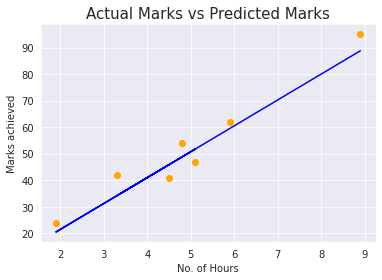

In [91]:
plt.scatter(x = x_test, y = y_test, color = 'orange')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Actual Marks vs Predicted Marks', size = 15)
plt.xlabel("No. of Hours")
plt.ylabel("Marks achieved")
plt.show()

**Evaluating the model** 

In [92]:
print("Mean Absolute Error of the model: ", mean_absolute_error(y_pred, y_test))

Mean Absolute Error of the model:  4.977930672127913


**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [94]:
no_hours = [9.25]
pred = reg_model.predict([no_hours])
print("Marks Predicted = {}".format(round(pred[0], 4)))

Marks Predicted = 92.199


**We can conclude on the basis of the model that if a student studies for 9.25 hours per day, he/she is likely to achieve 92.199 marks**